### Leerdoelen
- Je leert hoe je fixed-width data inleest
- Je leert een Business Understanding te formuleren bij een opdrachtgever en een gegeven dataset. 
- Je leert hoe je met naive bayes classificatie kan doen op een dataset
- Je leert hoe je tekst data kan voorbewerken via een Bag-of-Words aanpak voordat je het met naive bayes gebruikt
- Je leert figuren in je Data Understanding goed in context uit te leggen
- Je leert je conslusies uit het Data Understanding te verbinden aan de uitkomst van je Naive Bayes classifier
- Je leert een keuze tussen naive bayes modellen van toenemende complexiteit

### Achtergrondinformatie:
- Google naar:
    - `python naive bayes`
    - `python pandas read fixed width format`
    - `python naive bayes text classification`
    - `python sklearn generate word counts`
    - `python sklearn CountVectorizer`
    - `python bag of words`
- Datacamp course `Machine Learning with Tree-Based Models in Python` -> `Classification and Regression Trees`

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 

# Business Understanding
**Vul hier aan: we gaan in de opdracht een spamfilter bouwen. Schrijf hier een business understanding waarin je uitwerkt waarom hier een business case achter zit. Gebruik minstens 1 extra bron of link om je verhaal te ondersteunen.**

# Data Understanding
Wij gaan ons spamfilter trainen op [een set aan SMS'jes](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/), welke aangeleverd werd als een fixed-width data file:

In [1]:
# Lees het fixed-width tekst bestand met de sms'jes in

**Vul hier aan: werk de Data Understanding verder uit. Geef een overzicht van de data en eerste orde opvallende zaken.**

# Data preparation
De ruwe text is niet de input voor het model, we zetten deze eerst om naar een [term-document matrix](https://www.displayr.com/text-analysis-hooking-up-your-term-document-matrix-to-custom-r-code/). Deze geeft voor veel voorkomende woorden (terms) over de SMS'jes heen, per SMS'je of dit woord aanwezig is (0, 1). Deze aanpak is een voorbeeld van een [Bag-of-words](https://www.freecodecamp.org/news/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04/) aanpak: de tekst wordt een zak met woorden waar de volgorde van de woorden niet van belang is. 

Wij gebruiken [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) uit sklearn om dit voor ons te doen. Belangrijk hier is dat we alleen de 100 meest voorkomende woorden in de term-document matrix stoppen en dat we [stopwoorden](https://www.quora.com/What-are-stop-words-in-text-analysis) verwijderen. 

In [2]:
# Fit een transformatie met behulp van CountVectorizer (zie ook fit_transform)
# op de sms teksten. Gebruik de 100 meest voorkomende woorden en laat engelse
# stopwoorden weg

In [3]:
# Laat de 100 woorden zien die in de transformatie meegenomen zijn

In [4]:
# Bouw hier een term-document matrix op basis van de uitkomst van CountVectorizer

Om een eerste inschatting te maken van of de term-document matrix voorspellende kracht heeft maken we het volgende figuur:

In [5]:
feature_df = pd.concat([spam_sms['spam_or_ham'], 
                        pd.DataFrame(term_doc_matrix, 
                                     columns=vectorizer.get_feature_names())], 
                       axis=1)

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(16,1))
summed_wordcount_per_spam_ham = feature_df.groupby('spam_or_ham').sum()
summed_wordcount_all = summed_wordcount_per_spam_ham.sum().sort_values(ascending=False)
summed_wordcount_per_spam_ham = summed_wordcount_per_spam_ham.reindex(columns=summed_wordcount_all.index)
print(summed_wordcount_per_spam_ham)
sn.heatmap(summed_wordcount_per_spam_ham)

NameError: name 'pd' is not defined

**OPDRACHT!: Leg aan elkaar uit wat in de code gebeurt**

**Vul hier aan: wat zie je in dit figuur, wat valt je op? Wat is je inschatting: gaat een bag-of-words aanpak hier een goed onderscheid tussen `spam` en `ham` opleveren?**

# Modeling
**We gaan nu twee modellen maken: eentje met de top 100 woorden en eentje met de top 1000 woorden**
## Model met 100 woorden
Nu de data klaar staat gaan we de term-document matrix gebruiken om een Naive Bayes modellen te voeden. 

In [ ]:
# Fit hier een Naive Bayes model op basis van de term-document matrix die je eerder 
# gemaakt hebt (top 100 woorden). Voor Naive Bayes gebruiken we de `GaussianNB` functie
# uit sklearn. Vergeet niet om je dataset te splitsen in training en test.
# 
# Gebruik voor het inschatten van de performance vna het model de f1 score (functie f1_score)
# en de plot_confusion_matrix functie die je vorige week ook gebruikt hebt. 

**Vul hier aan: wat zie je in de performance van het model? Is dit een goed model? Waarin is het goed, waarin is het slecht?**

## Model met 1000 woorden
Om het model beter te maken gaan we meer woorden in de term-documen matrix stoppen zodat ze mee kunnen gaan in het model:

In [ ]:
# Maak een nieuwe term-document matrix, maar nu met de top 1000 woorden. Fit nu ook
# weer het model en laat de performance zien. 

**Vul hier aan: wat is je conclusie, is dit model beter hoe is het beter en slechter als je kijkt naar je confusion matrix**

## (*optioneel*) Verband tussen aantal woorden en model performance
We zien dat het ophogen van het aantal woorden van 100 naar 300 een beter resultaat oplevert. Maar waar ligt de grens? De volgende analyse verkent de performance van het model tussen de 1 en 2000 woorden:

..

C:\Users\PH0110357\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


..................................................................................................

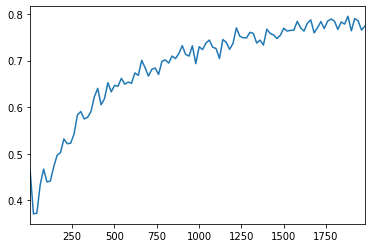

In [8]:
# schrijf de get_accuracy_per_max_feature functie die hieronder gebruikt wordt
# de functie neemt als input het maximaal aantal woorden wat meergenomen moet worden
# de functie geeft de f1_score terug

test_max_features = np.arange(1,2000,20)
pd.Series([get_accuracy_per_max_feature(mxft) for mxft in test_max_features], index=test_max_features).plot()

**Vul hier aan: wat is conclusie: hoeveel woorden moeten er in je term-document matrix?**

Als we kijken naar de confusion matrix van 1750 woorden:

.

0.7795191987308597

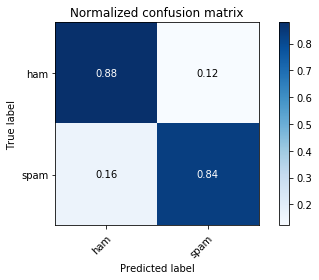

In [9]:
# Maak een confusion matrix voor de optimale hoeveelheid woorden. 
# Probeer hier de functie in te zetten of uit te breiden die je eerder gemaakt hebt. 

**Vul hier aan: voor het optimale hoeveelheid woorden, hoe goed is je model nu?**

# Evaluation
**Vul hier aan: wat vind je van je spam filter? Slaagt het in het doel wat je ervoor gesteld hebt? Zou jij hier mee kunnen werken?**

*Optioneel* **Vul hier aan: hoe zouden we ons model nog verder kunnen verbeteren?**